# Dashboard

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# constants
# data taken from https://www.kaggle.com/datasets/nathanlauga/nba-games?resource=download&select=games.csv
games_path = './data/games.csv'
game_detail_path = './data/games_details.csv'
ranking_path = './data/ranking.csv'
players_path = './data/players.csv'
teams_path = './data//teams.csv'

## Import Data

In [6]:
def load_data(games_path, game_detail_path, ranking_path, players_path, teams_path):
    data = {
        'games' : pd.read_csv(games_path),
        'games_detail' : pd.read_csv(game_detail_path),
        'ranking' : pd.read_csv(ranking_path),
        'players' : pd.read_csv(players_path),
        'teams' : pd.read_csv(teams_path)
    }
    return data
data = load_data(games_path, game_detail_path, ranking_path, players_path, teams_path)

/Users/vatsalpatel/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [9]:
# get dataframe stats
for k,v in data.items():
    print(k)
    print(v.shape)
    print(v.columns)
    print('\n')

games
(25796, 21)
Index(['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID',
       'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home',
       'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away',
       'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away',
       'REB_away', 'HOME_TEAM_WINS'],
      dtype='object')


games_detail
(645953, 29)
Index(['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID',
       'PLAYER_NAME', 'NICKNAME', 'START_POSITION', 'COMMENT', 'MIN', 'FGM',
       'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT',
       'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS',
       'PLUS_MINUS'],
      dtype='object')


ranking
(201792, 13)
Index(['TEAM_ID', 'LEAGUE_ID', 'SEASON_ID', 'STANDINGSDATE', 'CONFERENCE',
       'TEAM', 'G', 'W', 'L', 'W_PCT', 'HOME_RECORD', 'ROAD_RECORD',
       'RETURNTOPLAY'],
      dtype='object')


players
(7228, 4)
Index(['PLAYER

## Generate Visualizations

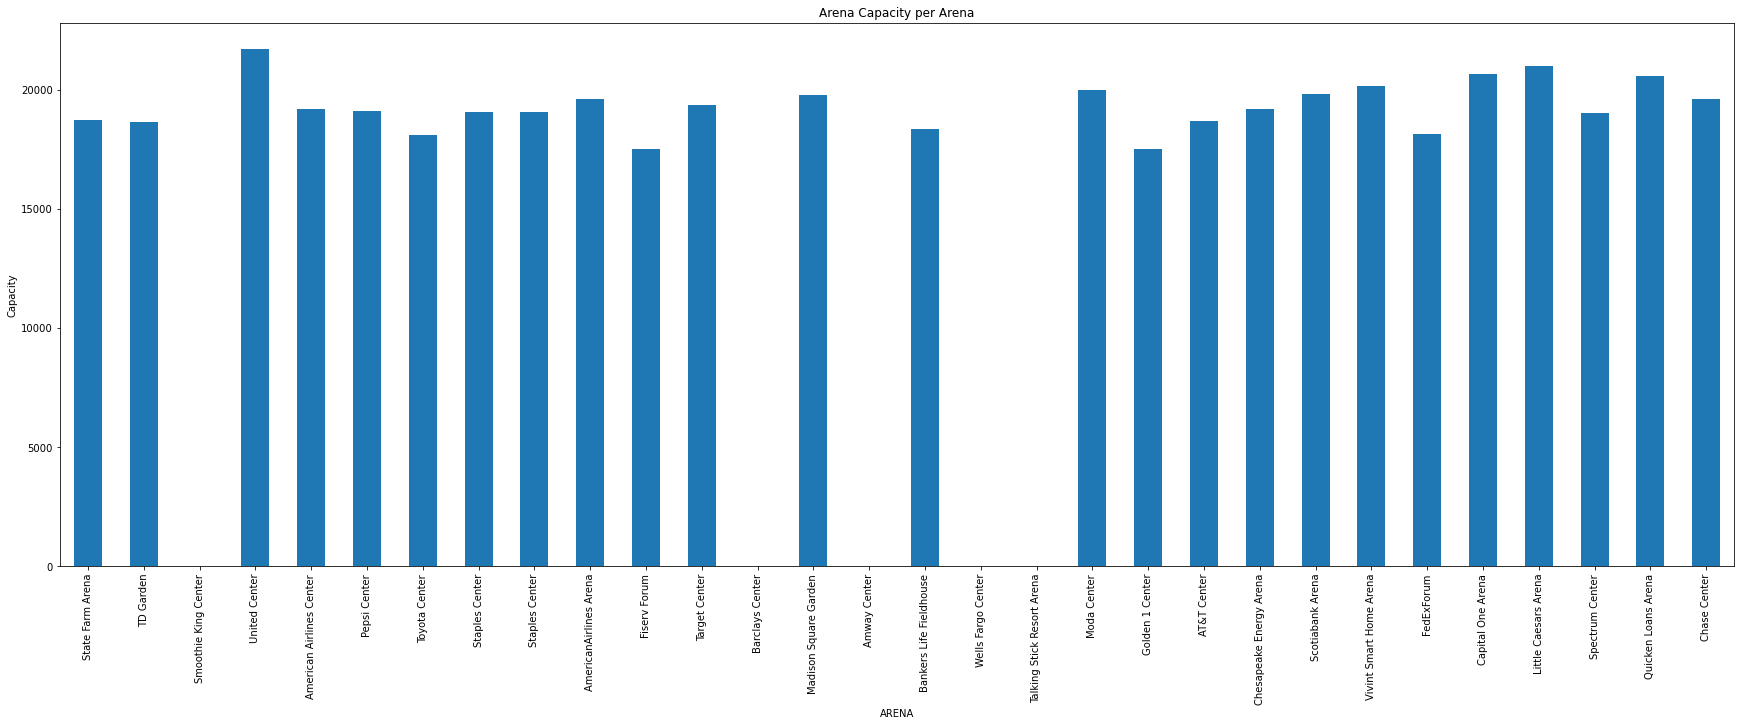

In [20]:
# arena capacity
data['teams'].plot('ARENA', 'ARENACAPACITY', kind = 'bar', legend = False, figsize = (30,10))
plt.xticks(rotation = 90)
plt.title('Arena Capacity per Arena')
plt.ylabel('Capacity')
plt.show()

<ipython-input-59-bf9f994e15f7>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  team_avgs = data['ranking'].groupby(['TEAM'])['G','W','L'].mean().reset_index().rename(columns = {


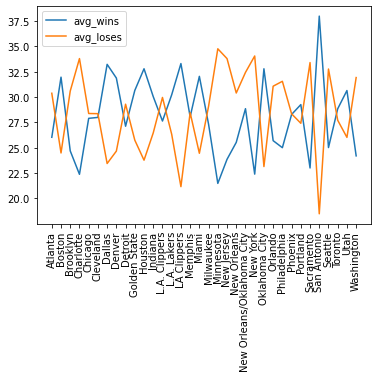

In [59]:
# team performance
team_avgs = data['ranking'].groupby(['TEAM'])['G','W','L'].mean().reset_index().rename(columns = {
    'G' : 'avg_games',
    'W' : 'avg_wins',
    'L' : 'avg_loses'
})

for c in ['avg_wins', 'avg_loses']:
    plt.plot(team_avgs['TEAM'].values, team_avgs[c].values, label = c)
#     team_avgs.plot('TEAM', c, legend = False, kind = 'line')
plt.xticks(rotation = 90)
plt.legend(loc = 'upper left')
plt.show()

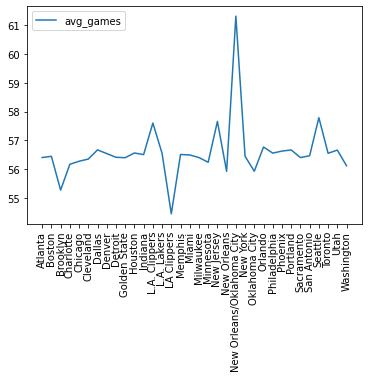

In [61]:
plt.plot(team_avgs['TEAM'].values, team_avgs['avg_games'].values, label = 'avg_games')
plt.xticks(rotation = 90)
plt.legend(loc = 'upper left')

In [63]:
data['games_detail']

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22101005,1610612750,MIN,Minnesota,1630162,Anthony Edwards,Anthony,F,NaN,36:22,...,0.0,8.0,8.0,5.0,3.0,1.0,1.0,1.0,15.0,5.0
1,22101005,1610612750,MIN,Minnesota,1630183,Jaden McDaniels,Jaden,F,NaN,23:54,...,2.0,4.0,6.0,0.0,0.0,2.0,2.0,6.0,14.0,10.0
2,22101005,1610612750,MIN,Minnesota,1626157,Karl-Anthony Towns,Karl-Anthony,C,NaN,25:17,...,1.0,9.0,10.0,0.0,0.0,0.0,3.0,4.0,15.0,14.0
3,22101005,1610612750,MIN,Minnesota,1627736,Malik Beasley,Malik,G,NaN,30:52,...,0.0,3.0,3.0,1.0,1.0,0.0,1.0,4.0,12.0,20.0
4,22101005,1610612750,MIN,Minnesota,1626156,D'Angelo Russell,D'Angelo,G,NaN,33:46,...,0.0,6.0,6.0,9.0,1.0,0.0,5.0,0.0,14.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645948,11200005,1610612743,DEN,Denver,202706,Jordan Hamilton,NaN,NaN,NaN,19,...,0.0,2.0,2.0,0.0,2.0,0.0,1.0,3.0,17.0,NaN
645949,11200005,1610612743,DEN,Denver,202702,Kenneth Faried,NaN,NaN,NaN,23,...,1.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0,18.0,NaN
645950,11200005,1610612743,DEN,Denver,201585,Kosta Koufos,NaN,NaN,NaN,15,...,3.0,5.0,8.0,0.0,1.0,0.0,0.0,3.0,6.0,NaN
645951,11200005,1610612743,DEN,Denver,202389,Timofey Mozgov,NaN,NaN,NaN,19,...,1.0,2.0,3.0,1.0,0.0,0.0,4.0,2.0,2.0,NaN
